
<figure>
<img src="/work/Modulo3_Caso2/fig/ISEADE LOGO Y ESCUDO.png" align="center"/> 
</figure> 

# Caso 2 - Limpieza y Transformación de Datos

## Problema de Negocio

Nos han dado a la tarea de entender varias características de nuestros clientes:
- ¿Qué podemos decir de ellos?
- ¿Qué puedes decir sobre los resultados de la campaña?
- Si fuéramos a lanzar una nueva campaña de marketing ¿cuáles serían los puntos de conversación más importantes?

## Importación de Módulos

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Importación de Datos

La información fue descargada de un conjunto de datos disponible en [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis). Estos datos son tabulares, y se encuentran en formato .csv. Por lo tanto pueden ser cargadas como una tabla en python. Esto puede ser realizado por medio de un DataFrame de pandas. 

In [ ]:
df_customers = pd.read_csv('/work/Modulo3_Caso2/data/Customers.csv',sep='\t')
df_customers.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


### CONTENIDO

Las tablas de datos suelen ir acompañadas de un diccionario de datos que explica el contenido de la información contenida en una de las columnas y, en ocasiones, proporciona algún contexto empresarial. 

#### Gente

- ID: identificador único del cliente
- Year_Birth: año de nacimiento del cliente
- Educación: nivel de educación del cliente
- Marital_Status: estado civil del cliente
- Ingresos: ingresos familiares anuales del cliente
- Kidhome: Número de niños en el hogar del cliente
- Teenhome: Número de adolescentes en el hogar del cliente
- Dt_Cliente: Fecha de alta del cliente en la empresa
- Actualidad: Número de días desde la última compra del cliente
- Queja: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

#### Productos

- MntWines: Cantidad gastada en vino en los últimos 2 años
- MntFruits: Cantidad gastada en frutas en los últimos 2 años
- MntMeatProducts: cantidad gastada en carne en los últimos 2 años
- MntFishProducts: cantidad gastada en pescado en los últimos 2 años
- MntSweetProducts: cantidad gastada en dulces en los últimos 2 años
- MntGoldProds: cantidad gastada en oro en los últimos 2 años


#### Promoción

- NumDealsPurchases: Número de compras realizadas con descuento
- AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario
- AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario
- AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ra campaña, 0 en caso contrario
- AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
- AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario
- Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario


#### Lugar

- NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa
- NumCatalogPurchases: Número de compras realizadas utilizando un catálogo
- NumStorePurchases: Número de compras realizadas directamente en tiendas
- NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes 

# Feature engineering básica



# Limpieza de Datos

### Limpieza de datos numéricos

En las ocasiones que tengamos valores inútiles, vacíos, nulos o con diferente formato al esperado, tendremos dos opciones:
- Eliminar toda la columna
- Eliminar toda la fila que contiene ese valor erróneo. (Como fue hecho anteriormente)
- Reemplazar el valor por el valor correcto conocido (En caso de ser posible)
- Reemplazar el valor por un valor lo más posible al esperado (Interpolación y métodos similares)

#### Ejemplo 1

En algunas ocasiones, será útil o necesario eliminar información que no va a ser necesaria en el análisis. En este caso, el `ID` del cliente puede ser una de esas variables

In [ ]:
print(df_customers.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [ ]:
df_customers.drop(columns=['ID'],inplace = True)

In [ ]:
print(df_customers.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


#### Ejercicio 1

Escoja alguna variable que considere que no sea importante para el análisis y elimínela.

**Respuesta**

#### Ejemplo 2

Observemos nuevamente el comportamiento de los datos en la columna `YearBirth` (Año de nacimiento)

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

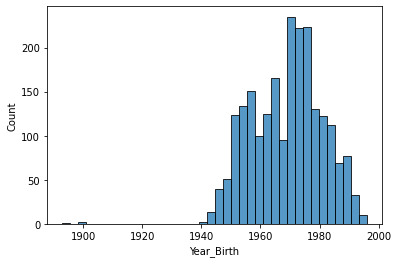

In [ ]:
sns.histplot(df_customers['Year_Birth'])

Habíamos observado anteriormente que estos datos tenían un error en los valores. Dado que algunos años son muy bajos. Por lo tanto existe la necesidad de removerlos

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

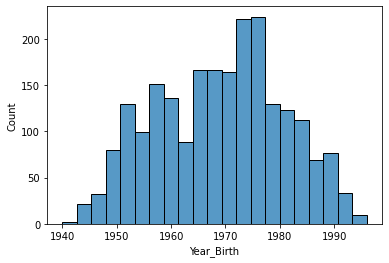

In [ ]:
df_customers = df_customers[df_customers['Year_Birth']>1930]
sns.histplot(df_customers['Year_Birth'])

#### Ejercicio 2

En el caso anterior había sido identificada la existencia de un error en los valores de la columna `Marital_Status`. Solucione este problema.

**Respuesta**

# Transformación de datos

### Transformación de datos de texto

Mediante el uso de fórmulas de datos, será posible modificar los datos de texto para que se ajusten al análsis que requerimos. Existen gran variedad de modificaciones que pueden ser realizadas. Tales como:
- Separar valores por un delimitador dado
- Extraer valores importantes de un código
- Eliminar signos de puntuación y caracteres especiales 
- Obtener palabras importantes de un texto largo

#### Ejemplo 3

Algunas veces tendremos que hacer transformaciones en el texto. Esto es de gran utilidad para trabajar con datos que contienen notas, escritos, comentarios, etc. 
En este caso podremos eliminar el texto de la columna `Marital_Status` para quedarnos solo con la primera letra de la palabra. 

In [ ]:
df_customers['Marital_Status'].head(5)

0      Single
1      Single
2    Together
3    Together
4     Married
Name: Marital_Status, dtype: object

In [ ]:
df_customers['Marital_Status'] = df_customers['Marital_Status'].str[0]
df_customers['Marital_Status'].head(5)

0    S
1    S
2    T
3    T
4    M
Name: Marital_Status, dtype: object

#### Ejercicio 3

De los datos ubicados en la columna `Education` conserve únicamente la primera letra.

**Respuesta**

### Transformación de datos numéricos

Los datos numéricos también pueden ser modificados. Algunas veces no tenemos todas las variables que necesitamos para nuestro análisis listas para usar, y podemos usar las existentes para crear nuevas variables que sean más relevantes. (Utilizado en la mayoría de las situaciones prácticas).

#### Ejemplo 4
Agreguemos una nueva columna con la edad de los clientes

In [ ]:
df_customers['Age'] = 2022 - df_customers['Year_Birth']
df_customers.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,S,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,65
1,1954,Graduation,S,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,68
2,1965,Graduation,T,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,57
3,1984,Graduation,T,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,38
4,1981,PhD,M,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,41


#### Ejercicio 4

Cree una nueva variable con el total de ofertas aceptadas por el cliente. 

**Respuesta**

### Transformación a datos categóricos

Es posible crear variables categóricas adicionales con el fin de agrupar características de variables cualitativas o cuantitativas.

#### Ejemplo 5

Se crea una variable categórica adicional que contiene información sobre si el cliente tiene o no hijos.

In [ ]:
def determinacion_padres(x):
    if x == 0:
        return False
    else:
        return True

df_customers['TieneHijos'] = df_customers['Kidhome'].apply(lambda x: determinacion_padres(x))
df_customers[['TieneHijos','Kidhome']].head(5)

,TieneHijos,Kidhome
0,False,0
1,True,1
2,False,0
3,True,1
4,True,1


#### Ejercicio 5

Asigne sus clientes a tres categorías basadas en la edad de estos

**Respuesta**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bb6c849-6b4b-49a2-8775-80ecb8e8b9b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>